<a href="https://colab.research.google.com/github/danhpham2000/Classification/blob/main/Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning Practice/hotel_reservation.csv")

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

1.There is no missing value, so we dont need deal with missing data

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


<AxesSubplot:>

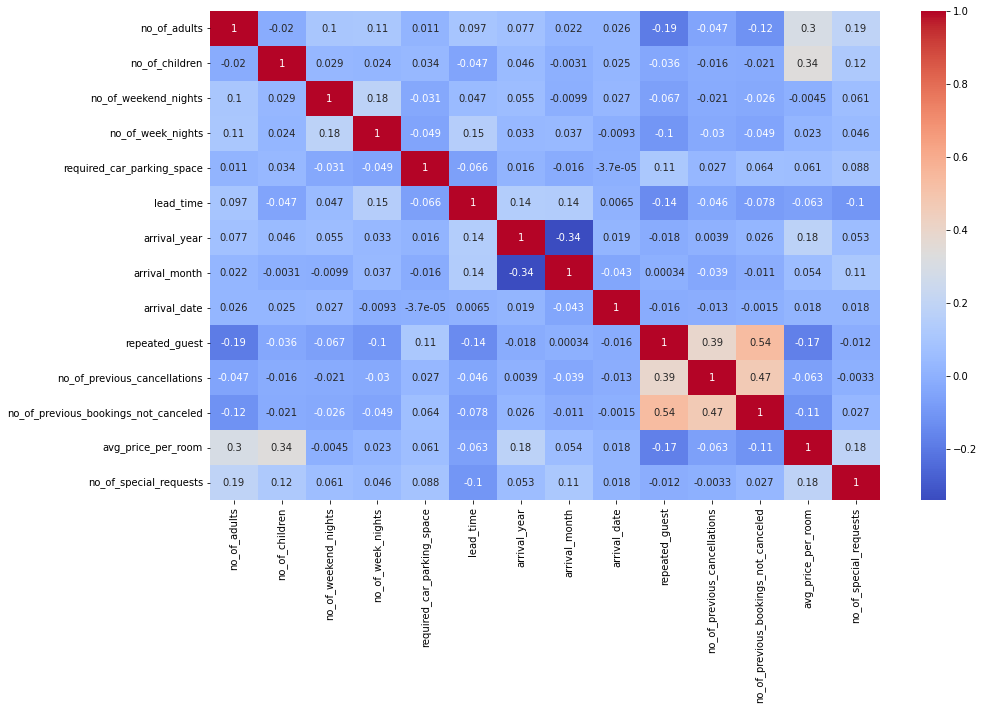

In [8]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

1. We can see that the repeated guest is more correlated with the number of previous cancellation

In [9]:
df.groupby("no_of_previous_cancellations")["booking_status"].describe()

,count,unique,top,freq
no_of_previous_cancellations,,,,
0,35937,2,Not_Canceled,24068
1,198,2,Not_Canceled,187
2,46,1,Not_Canceled,46
3,43,2,Not_Canceled,42
4,10,1,Not_Canceled,10
5,11,1,Not_Canceled,11
6,1,1,Not_Canceled,1
11,25,1,Not_Canceled,25
13,4,1,Canceled,4


In [10]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='booking_status', ylabel='count'>

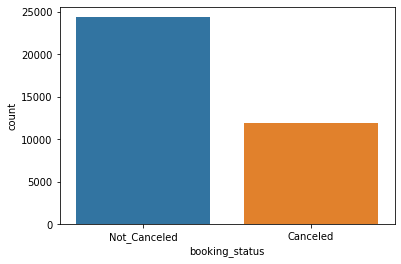

In [11]:
sns.countplot(df["booking_status"])

1. Seems like the plot said that over 10000 customers cancelled the booking reservation in the hotel

<AxesSubplot:xlabel='no_of_adults', ylabel='Count'>

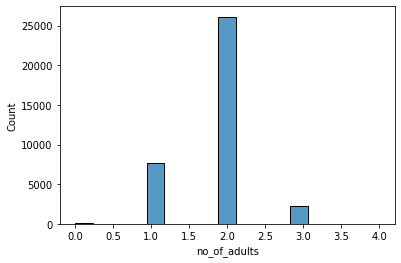

In [12]:
sns.histplot(df["no_of_adults"])

The data seems like focus on the number of adults

<AxesSubplot:>

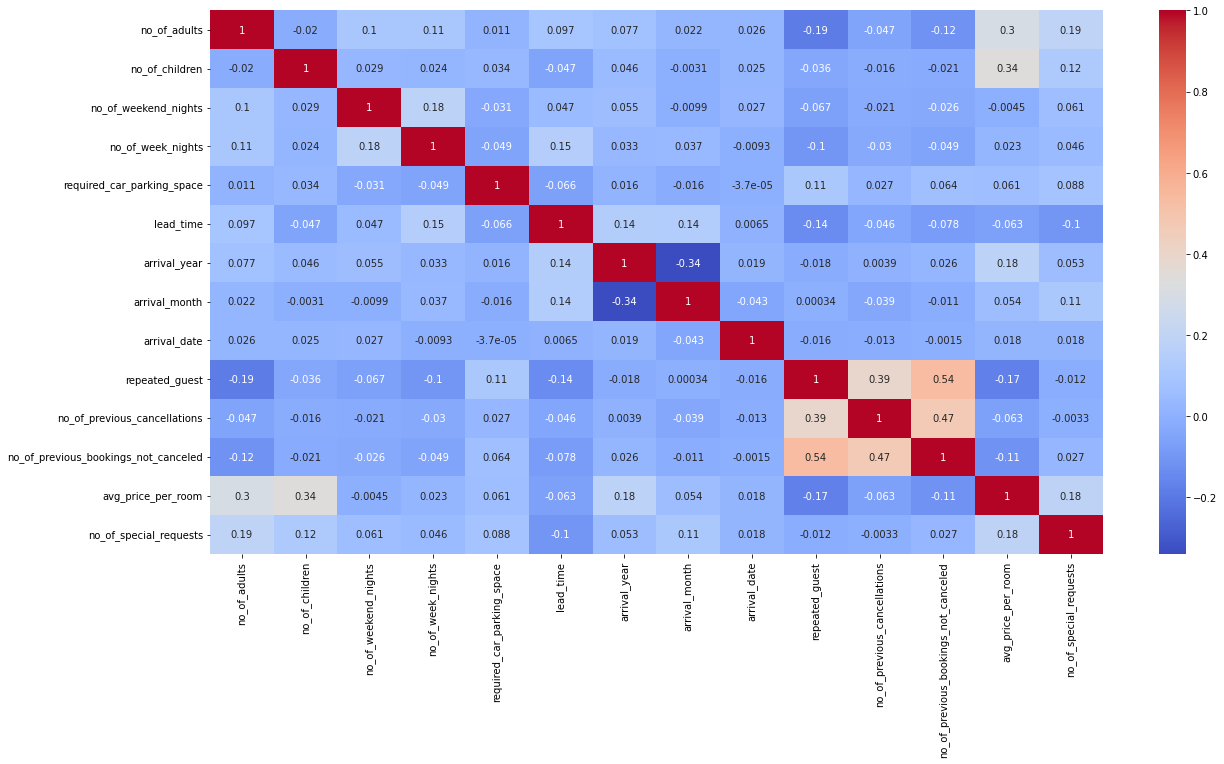

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<AxesSubplot:xlabel='repeated_guest', ylabel='no_of_previous_bookings_not_canceled'>

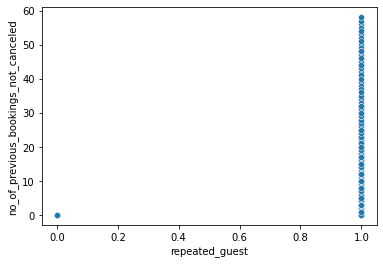

In [14]:
sns.scatterplot(x="repeated_guest", y="no_of_previous_bookings_not_canceled", data=df)

<AxesSubplot:xlabel='booking_status', ylabel='no_of_adults'>

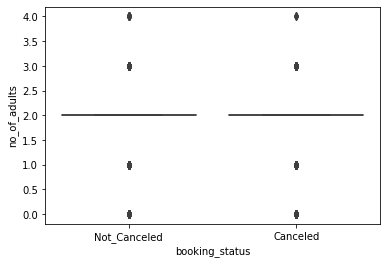

In [15]:
sns.boxplot(x="booking_status", y="no_of_adults", data=df)

In [16]:
df.groupby("booking_status")["repeated_guest"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
Canceled,11885.0,0.001346,0.036668,0.0,0.0,0.0,0.0,1.0
Not_Canceled,24390.0,0.037474,0.189925,0.0,0.0,0.0,0.0,1.0


1. Two third of total customer in repeated guest did not cancel the booking
2. One third of total customer in repeated guest did cancel the booking

In [17]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [18]:
print(df["type_of_meal_plan"].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']


In [19]:
df["required_car_parking_space"].unique()

array([0, 1])

<AxesSubplot:xlabel='required_car_parking_space', ylabel='count'>

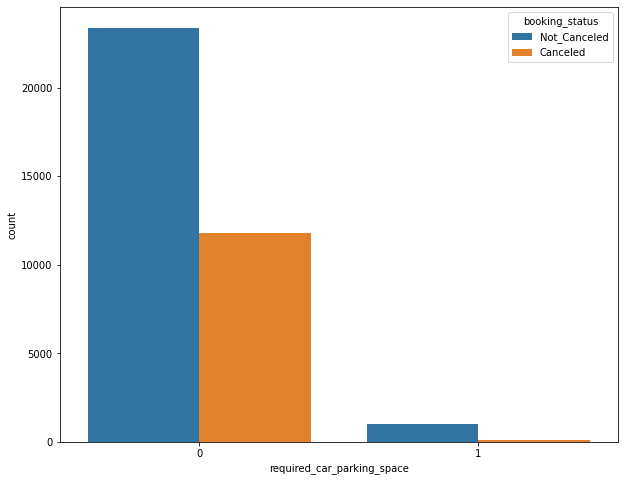

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x="required_car_parking_space", data=df, hue="booking_status")

1. The plot describe the majority of cancellation is on customer without parking space request
2. On the other hand, few customer requires parking space cancelled the booking

In [21]:
df["booking_status"] = df["booking_status"].map({"Not_Canceled": 1, "Canceled": 0})

In [22]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


In [23]:
df["booking_status"]

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [24]:
df["Booking_ID"].value_counts()

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

1. Booking ID seems to be useless with the booking status of the customer
2. We drop the column Booking ID

In [25]:
df.drop("Booking_ID", axis=1, inplace=True)

In [26]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0


In [27]:
df["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [28]:
df.groupby("type_of_meal_plan")["booking_status"].describe()

,count,mean,std,min,25%,50%,75%,max
type_of_meal_plan,,,,,,,,
Meal Plan 1,27835.0,0.688198,0.463238,0.0,0.0,1.0,1.0,1.0
Meal Plan 2,3305.0,0.544327,0.498107,0.0,0.0,1.0,1.0,1.0
Meal Plan 3,5.0,0.800000,0.447214,0.0,1.0,1.0,1.0,1.0
Not Selected,5130.0,0.668811,0.470687,0.0,0.0,1.0,1.0,1.0


In [29]:
df["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [30]:
df.groupby("room_type_reserved")["booking_status"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type_reserved,,,,,,,,
Room_Type 1,28130.0,0.677497,0.467442,0.0,0.0,1.0,1.0,1.0
Room_Type 2,692.0,0.670520,0.470364,0.0,0.0,1.0,1.0,1.0
Room_Type 3,7.0,0.714286,0.487950,0.0,0.5,1.0,1.0,1.0
Room_Type 4,6057.0,0.658412,0.474281,0.0,0.0,1.0,1.0,1.0
Room_Type 5,265.0,0.728302,0.445677,0.0,0.0,1.0,1.0,1.0
Room_Type 6,966.0,0.579710,0.493861,0.0,0.0,1.0,1.0,1.0
Room_Type 7,158.0,0.772152,0.420778,0.0,1.0,1.0,1.0,1.0


In [31]:
df["no_of_children"].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

<AxesSubplot:xlabel='no_of_children', ylabel='Count'>

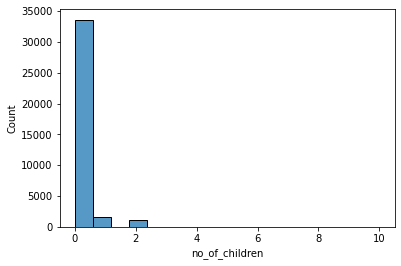

In [32]:
sns.histplot(x="no_of_children", data=df)

In [33]:
df.groupby("booking_status")["no_of_children"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
0,11885.0,0.124358,0.440903,0.0,0.0,0.0,0.0,9.0
1,24390.0,0.095982,0.382288,0.0,0.0,0.0,0.0,10.0


In [34]:
df.groupby("booking_status")["no_of_adults"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
0,11885.0,1.909550,0.486243,0.0,2.0,2.0,2.0,4.0
1,24390.0,1.813489,0.530993,0.0,2.0,2.0,2.0,4.0


In [35]:
df["lead_time"].value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

In [36]:
df.groupby("booking_status")["lead_time"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
0,11885.0,139.215482,98.947731,0.0,55.0,122.0,205.0,443.0
1,24390.0,58.927224,64.028714,0.0,10.0,39.0,86.0,386.0


In [37]:
df["lead_time"].nunique()

352

1. The lead time seems to much so we drop the column lead_time in order to train the model easier

In [38]:
df.drop("lead_time", axis=1, inplace=True)

In [39]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,2018,4,11,Online,0,0,0,94.50,0,0


<AxesSubplot:xlabel='avg_price_per_room', ylabel='Count'>

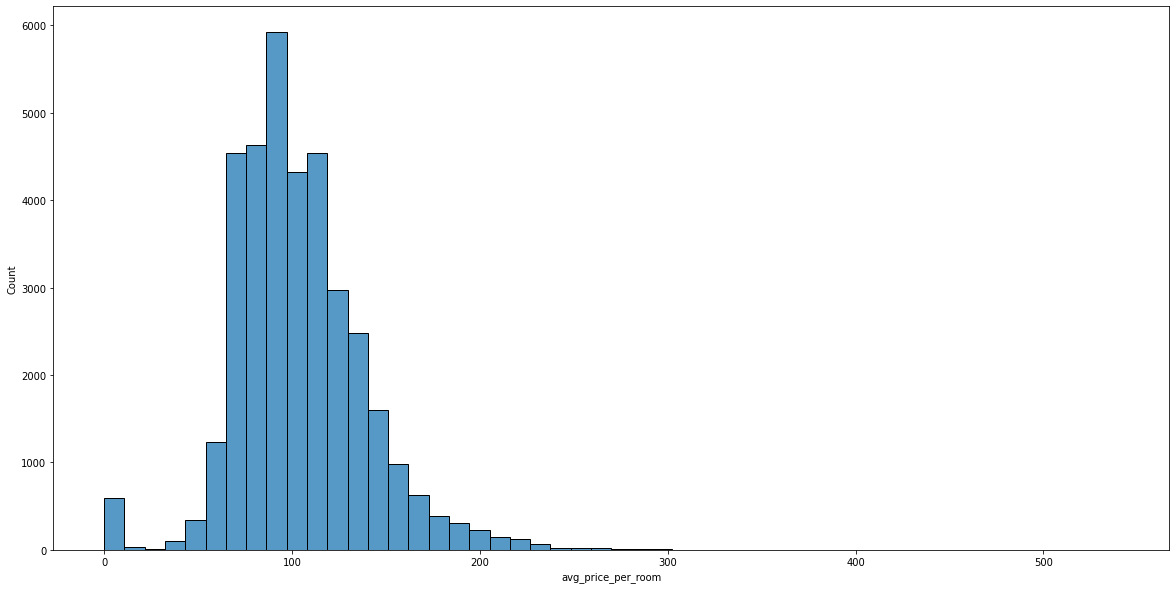

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(x="avg_price_per_room", data=df, bins=50)

In [41]:
df.groupby("booking_status")["avg_price_per_room"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
0,11885.0,110.589966,32.264394,0.0,89.27,108.0,126.36,540.0
1,24390.0,99.931412,35.872154,0.0,77.86,95.0,119.10,375.5


In [42]:
df["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [43]:
df.select_dtypes(["object"]).columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

In [44]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,2018,4,21,Online,0,0,0,94.50,0,0


In [45]:
df.drop("no_of_children", axis=1, inplace=True)

In [46]:
df

,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,Meal Plan 1,0,Room_Type 1,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,2,3,Not Selected,0,Room_Type 1,2018,11,6,Online,0,0,0,106.68,1,1
2,1,2,1,Meal Plan 1,0,Room_Type 1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,2,Meal Plan 1,0,Room_Type 1,2018,5,20,Online,0,0,0,100.00,0,0
4,2,1,1,Not Selected,0,Room_Type 1,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,2,6,Meal Plan 1,0,Room_Type 4,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,1,3,Meal Plan 1,0,Room_Type 1,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,2,6,Meal Plan 1,0,Room_Type 1,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,3,Not Selected,0,Room_Type 1,2018,4,21,Online,0,0,0,94.50,0,0


In [47]:
df["no_of_weekend_nights"].nunique()

8

In [48]:
df["no_of_week_nights"].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [49]:
df["no_of_special_requests"].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

In [50]:
df["arrival_year"].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [51]:
df.groupby("booking_status")["arrival_year"].describe()

,count,mean,std,min,25%,50%,75%,max
booking_status,,,,,,,,
0,11885.0,2017.919142,0.272629,2017.0,2018.0,2018.0,2018.0,2018.0
1,24390.0,2017.772325,0.419340,2017.0,2018.0,2018.0,2018.0,2018.0


In [52]:
df.drop(["arrival_month", "arrival_date"], axis=1, inplace=True)

In [53]:
df

,no_of_adults,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,Meal Plan 1,0,Room_Type 1,2017,Offline,0,0,0,65.00,0,1
1,2,2,3,Not Selected,0,Room_Type 1,2018,Online,0,0,0,106.68,1,1
2,1,2,1,Meal Plan 1,0,Room_Type 1,2018,Online,0,0,0,60.00,0,0
3,2,0,2,Meal Plan 1,0,Room_Type 1,2018,Online,0,0,0,100.00,0,0
4,2,1,1,Not Selected,0,Room_Type 1,2018,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,2,6,Meal Plan 1,0,Room_Type 4,2018,Online,0,0,0,167.80,1,1
36271,2,1,3,Meal Plan 1,0,Room_Type 1,2018,Online,0,0,0,90.95,2,0
36272,2,2,6,Meal Plan 1,0,Room_Type 1,2018,Online,0,0,0,98.39,2,1
36273,2,0,3,Not Selected,0,Room_Type 1,2018,Online,0,0,0,94.50,0,0


In [54]:
df.select_dtypes("object").columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], dtype='object')

In [55]:
dummies = pd.get_dummies(df["type_of_meal_plan"], drop_first=True)

In [56]:
df = pd.concat([df.drop("type_of_meal_plan", axis=1), dummies], axis=1)

In [57]:
df

,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Meal Plan 2,Meal Plan 3,Not Selected
0,2,1,2,0,Room_Type 1,2017,Offline,0,0,0,65.00,0,1,0,0,0
1,2,2,3,0,Room_Type 1,2018,Online,0,0,0,106.68,1,1,0,0,1
2,1,2,1,0,Room_Type 1,2018,Online,0,0,0,60.00,0,0,0,0,0
3,2,0,2,0,Room_Type 1,2018,Online,0,0,0,100.00,0,0,0,0,0
4,2,1,1,0,Room_Type 1,2018,Online,0,0,0,94.50,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,2,6,0,Room_Type 4,2018,Online,0,0,0,167.80,1,1,0,0,0
36271,2,1,3,0,Room_Type 1,2018,Online,0,0,0,90.95,2,0,0,0,0
36272,2,2,6,0,Room_Type 1,2018,Online,0,0,0,98.39,2,1,0,0,0
36273,2,0,3,0,Room_Type 1,2018,Online,0,0,0,94.50,0,0,0,0,1


In [58]:
df.select_dtypes("object").columns

Index(['room_type_reserved', 'market_segment_type'], dtype='object')

In [59]:
dummies = pd.get_dummies(df["room_type_reserved"], drop_first=True)

df = pd.concat([df.drop("room_type_reserved", axis=1), dummies], axis=1)

In [60]:
df.select_dtypes("object").columns

Index(['market_segment_type'], dtype='object')

In [61]:
dummies = pd.get_dummies(df["market_segment_type"], drop_first=True)

df = pd.concat([df.drop("market_segment_type", axis=1), dummies], axis=1)
                    

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_weekend_nights                  36275 non-null  int64  
 2   no_of_week_nights                     36275 non-null  int64  
 3   required_car_parking_space            36275 non-null  int64  
 4   arrival_year                          36275 non-null  int64  
 5   repeated_guest                        36275 non-null  int64  
 6   no_of_previous_cancellations          36275 non-null  int64  
 7   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 8   avg_price_per_room                    36275 non-null  float64
 9   no_of_special_requests                36275 non-null  int64  
 10  booking_status                        36275 non-null  int64  
 11  Meal Plan 2    

1. Now, we all have the columns to be numerical value.
2. It's time to train and fit the model

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop("booking_status", axis=1)
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [65]:
X_train.shape, X_test.shape

((29020, 23), (7255, 23))

In [66]:
y_train.shape, y_test.shape

((29020,), (7255,))

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
X_train = scaler.fit_transform(X_train)

In [70]:
X_test = scaler.transform(X_test)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [72]:
model = Sequential()

# Input layer
model.add(Dense(23, activation="relu"))
model.add(Dropout(0.2))

# Hidden layer
model.add(Dense(11, activation="relu"))
model.add(Dropout(0.2))

# Hidenn layer
model.add(Dense(11, activation="relu"))
model.add(Dropout(0.2))


# Output layer
model.add(Dense(1, activation="sigmoid"))

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam")

In [73]:
model.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/10
114/114 [==============================] - 6s 5ms/step - loss: 0.6327 - val_loss: 0.5908
Epoch 2/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5848 - val_loss: 0.5359
Epoch 3/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5560 - val_loss: 0.5168
Epoch 4/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5432 - val_loss: 0.5085
Epoch 5/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5384 - val_loss: 0.5091
Epoch 6/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5344 - val_loss: 0.5054
Epoch 7/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5306 - val_loss: 0.5016
Epoch 8/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5264 - val_loss: 0.4986
Epoch 9/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5264 - val_loss: 0.4981
Epoch 10/10
114/114 [==============================] - 0s 4ms/step - loss: 0.5230 - val_loss: 0.4957

In [74]:
model.history.history

{'loss': [0.632663905620575,
  0.5847644209861755,
  0.556006133556366,
  0.5431692004203796,
  0.5384349226951599,
  0.5343875885009766,
  0.5305763483047485,
  0.5264064073562622,
  0.5264398455619812,
  0.5230135321617126],
 'val_loss': [0.5907731056213379,
  0.5359215140342712,
  0.5167945623397827,
  0.5084760785102844,
  0.5091473460197449,
  0.5053730607032776,
  0.5015801787376404,
  0.49860790371894836,
  0.49810609221458435,
  0.4957491457462311]}

In [75]:
losses = pd.DataFrame(model.history.history)

In [76]:
losses

,loss,val_loss
0,0.632664,0.590773
1,0.584764,0.535922
2,0.556006,0.516795
3,0.543169,0.508476
4,0.538435,0.509147
5,0.534388,0.505373
6,0.530576,0.501580
7,0.526406,0.498608
8,0.526440,0.498106
9,0.523014,0.495749


<AxesSubplot:>

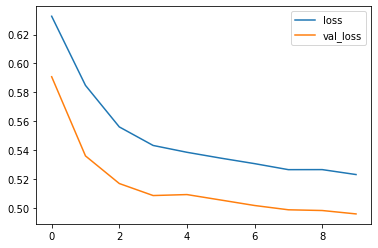

In [77]:
losses.plot()

In [78]:
from sklearn.metrics import classification_report

In [79]:
y_preds = np.argmax(model.predict(X_test), axis=1)

227/227 [==============================] - 0s 1ms/step


In [80]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.32      1.00      0.49      2357
           1       0.00      0.00      0.00      4898

    accuracy                           0.32      7255
   macro avg       0.16      0.50      0.25      7255
weighted avg       0.11      0.32      0.16      7255



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model = LogisticRegression(max_iter=1000)


In [83]:
X = df.drop("booking_status", axis=1)
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [84]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
y_preds = model.predict(X_test)

In [86]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.62      0.44      0.52      2357
           1       0.76      0.87      0.81      4898

    accuracy                           0.73      7255
   macro avg       0.69      0.66      0.67      7255
weighted avg       0.72      0.73      0.72      7255



In [87]:
model = RandomForestClassifier()

In [88]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_preds = model.predict(X_test)

In [90]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      2357
           1       0.87      0.88      0.87      4898

    accuracy                           0.83      7255
   macro avg       0.80      0.80      0.80      7255
weighted avg       0.83      0.83      0.83      7255



In [91]:
y_preds

array([1, 0, 0, ..., 1, 0, 1])

In [92]:
model = KNeighborsClassifier()

In [93]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
y_preds = model.predict(X_test)

In [95]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      2357
           1       0.85      0.86      0.85      4898

    accuracy                           0.80      7255
   macro avg       0.77      0.77      0.77      7255
weighted avg       0.80      0.80      0.80      7255



In [96]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [97]:
grid = {"n_estimators": [10,100,200,500,1000,1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]}


np.random.seed(42)
X = df.drop("booking_status", axis=1)
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
model_tunning = RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=1),
                                   param_distributions=grid,
                                   verbose=2,
                                   cv=5)

In [99]:
model_tunning.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=  12.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=  11.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=  11.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=  12.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=  12.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [100]:
model_tunning.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [101]:
y_preds_tunning = model_tunning.predict(X_test)

In [102]:
print(classification_report(y_test, y_preds_tunning))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70      2416
           1       0.83      0.91      0.87      4839

    accuracy                           0.82      7255
   macro avg       0.81      0.77      0.78      7255
weighted avg       0.82      0.82      0.81      7255



## Now we are going to use Grid Search CV to tune the hyperparameters and seems like the RandomSearchCV did not improve the model at all

In [103]:
grid_2 = {"n_estimators": [100,200,500],
          "max_depth": [None],
          "min_samples_split": [6, 7, 8],
          "min_samples_leaf": [1, 2, 5]}

In [104]:
np.random.seed(42)
X = df.drop("booking_status", axis=1)
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
model = RandomForestClassifier(n_jobs=1)

In [106]:
gs_model = GridSearchCV(estimator=model, param_grid=grid_2, cv=3, verbose=2)

In [107]:
gs_model.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   7.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   7.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   7.6s
[CV] END max

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [6, 7, 8],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [108]:
gs_model.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 500}

In [109]:
y_preds_gs = gs_model.predict(X_test)

In [110]:
print(classification_report(y_test, y_preds_gs))

              precision    recall  f1-score   support

           0       0.77      0.69      0.72      2416
           1       0.85      0.90      0.87      4839

    accuracy                           0.83      7255
   macro avg       0.81      0.79      0.80      7255
weighted avg       0.82      0.83      0.82      7255



In [111]:
from sklearn.svm import SVC

In [112]:
model = SVC()

In [113]:
model.fit(X_train, y_train)

SVC()

In [114]:
y_preds_SVC = model.predict(X_test)

In [115]:
print(classification_report(y_test, y_preds_SVC))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2416
           1       0.67      1.00      0.80      4839

    accuracy                           0.67      7255
   macro avg       0.33      0.50      0.40      7255
weighted avg       0.44      0.67      0.53      7255



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
model = GaussianNB()

In [118]:
model.fit(X_train, y_train)

GaussianNB()

In [119]:
y_preds_nb = model.predict(X_test)

In [120]:
print(classification_report(y_test, y_preds_nb))

              precision    recall  f1-score   support

           0       0.36      0.97      0.52      2416
           1       0.89      0.13      0.23      4839

    accuracy                           0.41      7255
   macro avg       0.62      0.55      0.38      7255
weighted avg       0.71      0.41      0.33      7255



In [121]:
np.random.seed(42)
X = df.drop("booking_status", axis=1)
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [146]:
model = RandomForestClassifier(n_estimators=1000,min_samples_leaf=1)

In [147]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [148]:
y_preds = model.predict(X_test)

In [149]:

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      2416
           1       0.86      0.87      0.87      4839

    accuracy                           0.82      7255
   macro avg       0.80      0.79      0.79      7255
weighted avg       0.82      0.82      0.82      7255

